In [1]:
import pickle

with open('train_magnetism.pkl', 'rb') as f:
    train_magnetism = pickle.load(f)

with open('test_magnetism.pkl', 'rb') as f:
    test_magnetism = pickle.load(f)

In [2]:
print(len(train_magnetism))

31


In [3]:
# training and testing split

train = train_magnetism[2]
test = test_magnetism[2]

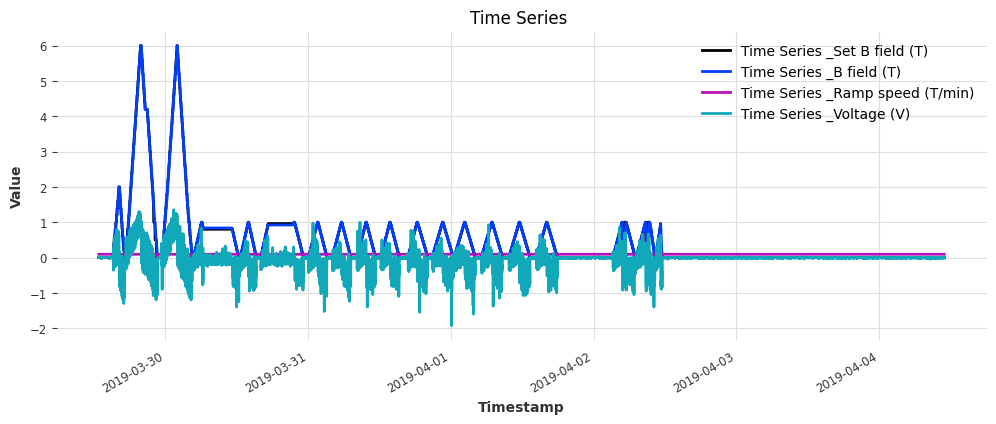

In [4]:
import matplotlib.pyplot as plt
from darts import TimeSeries

plt.figure(figsize=(12, 4))
train.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

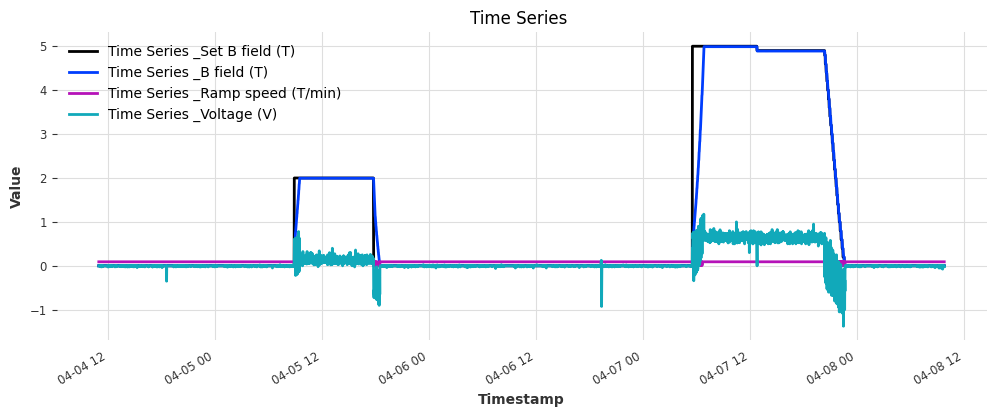

In [5]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming 'time_series_list' is the list of Darts TimeSeries objects

# Create a separate window for each time series
plt.figure(figsize=(12, 4))
test.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
print(len(train))

8531


<Axes: xlabel='Timestamp'>

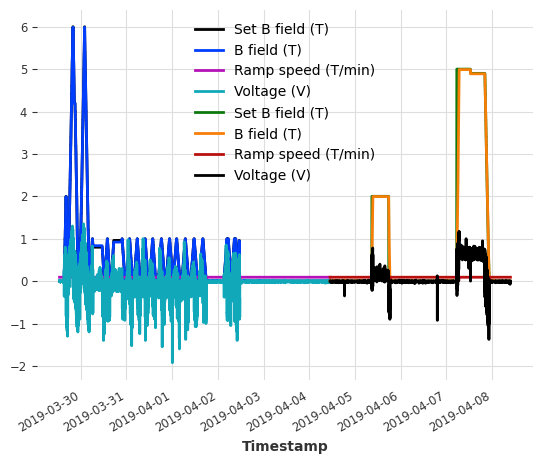

In [7]:
train.plot()
test.plot()

<Axes: xlabel='Timestamp'>

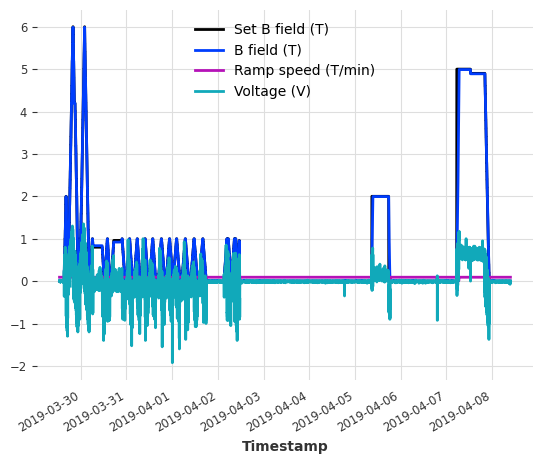

In [8]:
series = train.concatenate(test)
series.plot()

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


<Axes: xlabel='Timestamp'>

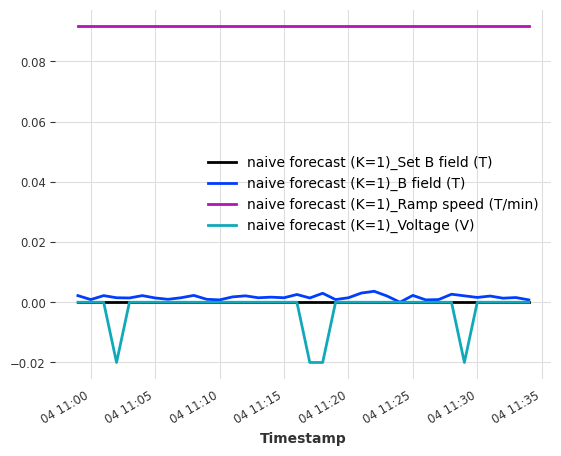

In [9]:
# even naive forecast seems to be finding some patterns
# i need to change set b field into a future covariate so that these 
# forecasts are more accurate 

from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=300)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

# test.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

# RNN Model With Univariate and Set B field as future covariate 

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

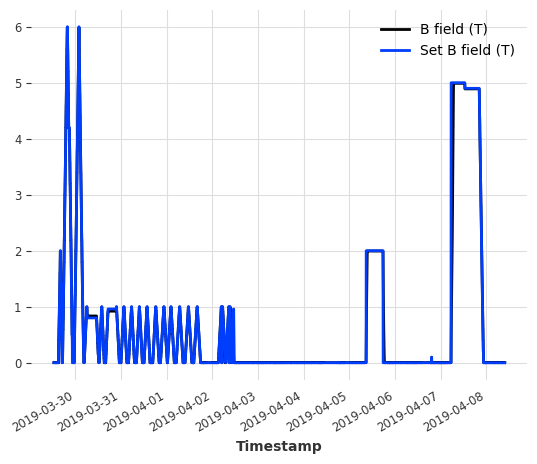

In [10]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts import add_covariate

print(series.columns)

train_series = series['B field (T)']   # Assuming the first variable is your target
covariate_series = series['Set B field (T)'] # Assuming the second variable is your covariate

train_series.plot()
covariate_series.plot()

In [11]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
print(len(train_series))

7109


In [13]:
# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(input_chunk_length=500, output_chunk_length=1, n_epochs=10)

# Fit the model to the training data
model.fit(train_series, future_covariates = covariate_series, verbose=True)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 725   
4 | V             | Linear           | 26    
---------------------------------------------------
751       Trainable params
0         Non-trainable params
751       Total params
0.003     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 46.65it/s, train_loss=0.001]   

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 46.65it/s, train_loss=0.001]


RNNModel(model=RNN, hidden_dim=25, n_rnn_layers=1, dropout=0.0, training_length=24, input_chunk_length=500, output_chunk_length=1, n_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:04<00:00,  0.23it/s]


<Axes: xlabel='Timestamp'>

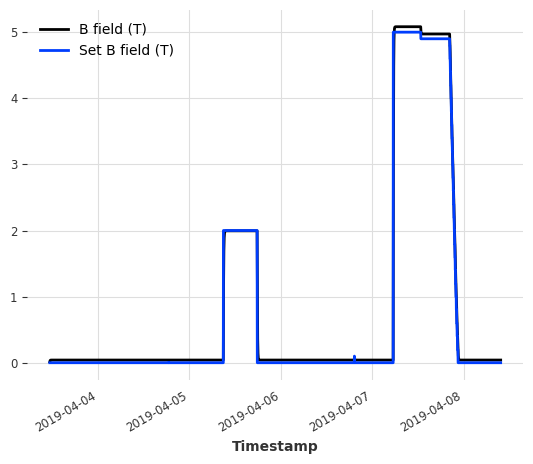

In [14]:
pred_series = model.predict(n=7110)
# print(len(val_series))
# print(len(val_series))
pred_series.plot()
# val_series.plot()
covariate_series[-7109:].plot()
# # Evaluate the performance using Mean Absolute Percentage Error (MAPE)
# mape_error = mape(val_series, pred_series)
# print(f'MAPE on validation set: {mape_error:.2f}%')

In [16]:
from darts.metrics import mape, marre, mse

print(marre(val_series,pred_series))
print(mse(val_series,pred_series))

1.5238502994179726
0.090070136


# RNN With Multivariate Target Data, but still only one future covariate

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

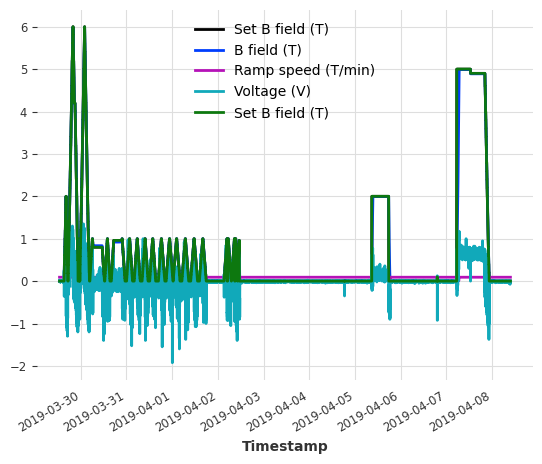

In [17]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts import add_covariate

print(series.columns)

train_series = series  # Assuming the first variable is your target
covariate_series = series['Set B field (T)'] # Assuming the second variable is your covariate

train_series.plot()
covariate_series.plot()

In [18]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
print(len(train_series))

7109


In [41]:
# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(input_chunk_length=400, output_chunk_length=100, n_epochs=10)

# Fit the model to the training data
model.fit(train_series, future_covariates = covariate_series, verbose=True)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 48.79it/s, train_loss=0.0109] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 48.78it/s, train_loss=0.0109]


RNNModel(model=RNN, hidden_dim=25, n_rnn_layers=1, dropout=0.0, training_length=24, input_chunk_length=400, output_chunk_length=100, n_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.32it/s]


<Axes: xlabel='Timestamp'>

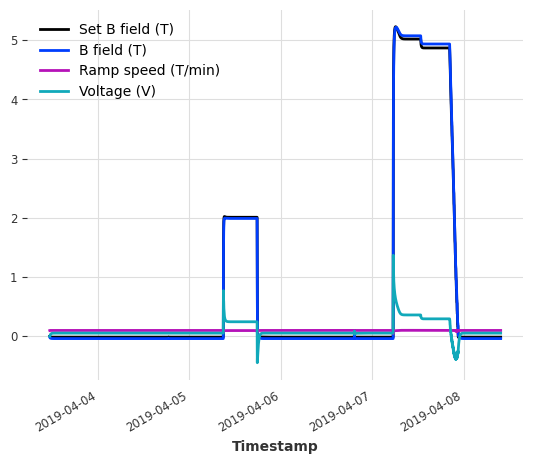

In [42]:
pred_series = model.predict(n=7110)
# print(len(val_series))
# print(len(val_series))
pred_series.plot()

<Axes: xlabel='Timestamp'>

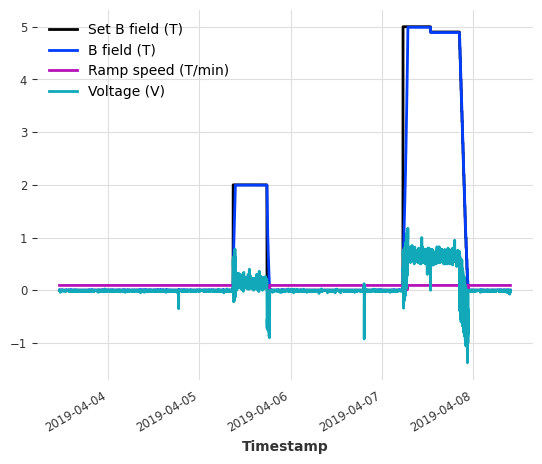

In [94]:
val_series.plot()

In [95]:
import matplotlib.pyplot as plt

model = []
pred_series = []

for in_chunk in range(10, 100, 10):
    model.append(RNNModel(input_chunk_length=in_chunk, output_chunk_length=1, n_epochs=10))
    model[-1].fit(train_series, future_covariates=covariate_series, verbose=True)
    trained = model[-1].predict(n=7110)
    pred_series.append(trained)
    
    # Create a new figure for each iteration
    plt.figure()
    trained.plot()

plt.show()  # Show all figures at once after the loop completes


ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)


Epoch 7:  63%|██████▎   | 140/222 [00:02<00:01, 47.39it/s, train_loss=0.00789]

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s]

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)



Epoch 2:  95%|█████████▌| 212/222 [00:04<00:00, 47.94it/s, train_loss=0.0252] 